# HR Analytics Challenge

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_LZdllcl.csv')

In [3]:
df.shape

(54808, 14)

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

<AxesSubplot:>

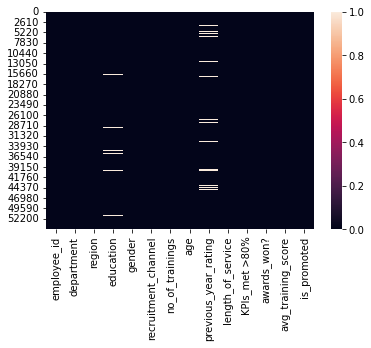

In [11]:
sns.heatmap(df.isna())

In [8]:
df["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
#To make non  numeric columns to numeric
le = LabelEncoder()
df.drop('employee_id',axis=1)
for j in list(['department', 'region', 'gender','recruitment_channel']):
    df[j] = le.fit_transform(df[j])
  
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,Master's & above,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,Bachelor's,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,Bachelor's,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,Bachelor's,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,Bachelor's,1,0,1,45,3.0,2,0,0,73,0


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

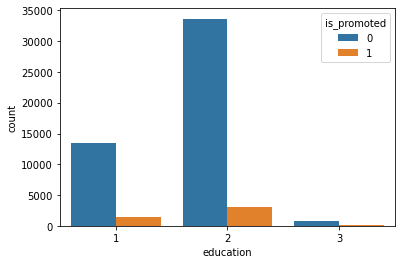

In [13]:
def fun_to_label_edu(x):
    x = str(x)
    if x == "Master's & above":
        x = 1
    elif x == "Bachelor's":
        x = 2
    elif x == "Below Secondary":
        x = 3
    return x



df['education'] = df['education'].apply(fun_to_label_edu)


df.loc[df['education']=='nan' , 'education'] = np.nan


sns.countplot(df['education'],hue=df['is_promoted'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='department', ylabel='count'>

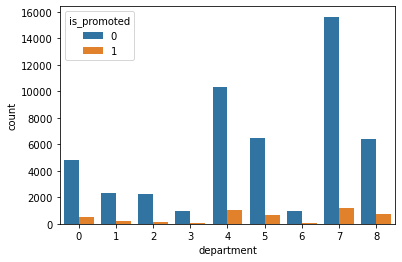

In [14]:
sns.countplot(df['department'],hue=df['is_promoted'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

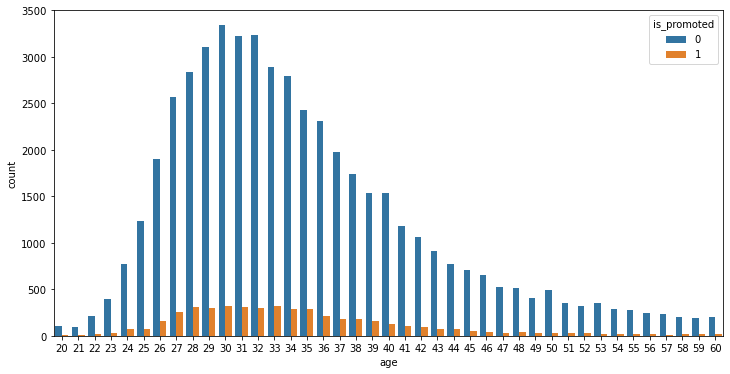

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(df['age'],hue=df['is_promoted'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

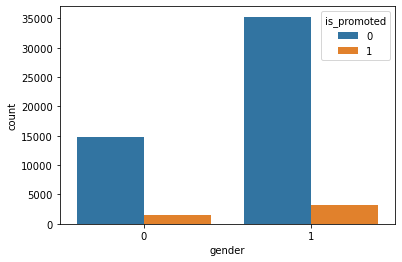

In [16]:
sns.countplot(df['gender'],hue=df['is_promoted'])